## Weather Sampling Analysis
1. As expected, temperatures are generally highest close to the equator and decrease when further away. As the data in this sample was pulled in late September (shortly after the seasonal lag from the summer solstice caught up and temperatures begin to decline,) the temperatures actually skewed higher toward the northern hemisphere, with peak temperatures at approximately 10 degrees north.

2. There is no appreciable trend in cloud cover, relative humidity, or wind speed relative to latitude. However, it should be noted that the perceived humidity (and partial pressure of water in the air) would be generally be much higher closer to the equator because of the generally warmer air hold more water with equally high relative humidities.

3. Despite sampling of data from random coordinates, there still exists bias towards island and coastal cities. This is because greater than 70% of the Earth is covered in water, and attempting to pull samples from oceans would result in sampling the closest coastal city. *This would be even more significant in the Southern Hemisphere where there is less landmass*. Removing redundant cities helps somewhat, but the effects may be visible in the data.
    -  About 50% of the sampled cities have over 80% relative humidity, which could be because coastal cities have higher humidity than landlocked cities.
    - A few samples from 0 to 20 degrees south have an isolated trend of lower temperatures than other reported cities. These are likely a few non-coastal cities because coastal cities maintain more consistent temperatures during seasonal changes due to the insulation/heat-retention of water. Therefore, non-coastal cities in the southern hemisphere would have dropped to lower temperatures in the winter and and just begun warming up.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    nearcity= citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = nearcity.city_name
    country = nearcity.country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
cities_count = len(cities)
cities_count

581

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 



In [4]:
## Begin API calls
found=0
# get time of api call
calltime=time.gmtime()
# format time for display
calltimestring=f"{calltime[0]}-{calltime[1]}-{calltime[2]} {calltime[3]}-{calltime[4]}-{calltime[5]} GMT"
calltimepretty=f"{calltime[0]}-{calltime[1]}-{calltime[2]} {calltime[3]}:{calltime[4]}:{calltime[5]} (GMT)"
calldatestring=calltimestring.split(" ")[0]

# declare where data will store
lats = []
tems = []
hums = []
clds = []
wnds = []
dats = []
nams = []
cnys = []

# Open log to write printout of calls
log_file = f"logs/call_log {calltimestring}.txt"
with open(log_file,"w") as log:
    call=f"{url}&q={city},{country}"
    print(f"Begin calls to openweathermap at {calltimepretty}.")
    log.write(f"Begin calls to openweathermap at {calltimepretty}.")
#   Call API for each contry in the list
    for i in range(cities_count):
    #   i=0
        city=cities[i]
        country=countries[i]
        call=f"{url}&q={city},{country}"
        weather_response = requests.get(call).json()
        if weather_response["cod"]=="404":
#           Report in log if city is not found
            report=f"Call city {i+1}: {city}, {country}. City not found."
        else:
            found += 1
#           Store data from API
            lats.append(weather_response["coord"]["lat"])
            tems.append(weather_response["main"]["temp"])
            hums.append(weather_response["main"]["humidity"])
            clds.append(weather_response["clouds"]["all"])
            wnds.append(weather_response["wind"]["speed"])
            dats.append(weather_response["dt"])
#           Get the correct capitalization for the city while I'm here.
            nam = (weather_response["name"])
            cny = (weather_response["sys"]["country"])
            nams.append(nam)
            cnys.append(cny)
            report=f"Call city {i+1}: {nam}, {cny}. Successful."
        print(report)
        log.write(f"\n{report}")
#   Close log
    endtime=time.gmtime()
    endtimepretty=f"{endtime[0]}-{endtime[1]}-{endtime[2]} {endtime[3]}:{endtime[4]}:{endtime[5]} (GMT)"
    print(f"Calls completed at {endtimepretty}. {found} cities found.")
    log.write(f"\nCalls completed at {endtimepretty}. {found} cities found.")

Begin calls to openweathermap at 2018-9-26 12:25:40 (GMT).
Call city 1: Castro, CL. Successful.
Call city 2: Kapaa, US. Successful.
Call city 3: Odienne, CI. Successful.
Call city 4: kalabugao, ph. City not found.
Call city 5: Rikitea, PF. Successful.
Call city 6: mataura, pf. City not found.
Call city 7: Chumikan, RU. Successful.
Call city 8: illoqqortoormiut, gl. City not found.
Call city 9: Nanortalik, GL. Successful.
Call city 10: Ushuaia, AR. Successful.
Call city 11: Luganville, VU. Successful.
Call city 12: Moerai, PF. Successful.
Call city 13: Souillac, MU. Successful.
Call city 14: Huejuquilla el Alto, MX. Successful.
Call city 15: Punta Arenas, CL. Successful.
Call city 16: Hilo, US. Successful.
Call city 17: Luanda, AO. Successful.
Call city 18: Fort Nelson, CA. Successful.
Call city 19: Baijiantan, CN. Successful.
Call city 20: Butaritari, KI. Successful.
Call city 21: San Cristobal, EC. Successful.
Call city 22: Narsaq, GL. Successful.
Call city 23: Sivas, TR. Successful.


Call city 199: Saskylakh, RU. Successful.
Call city 200: Yulara, AU. Successful.
Call city 201: Kapit, MY. Successful.
Call city 202: Nara, ML. Successful.
Call city 203: Leningradskiy, RU. Successful.
Call city 204: bolungarvik, is. City not found.
Call city 205: Santa Rosalia, MX. Successful.
Call city 206: san quintin, mx. City not found.
Call city 207: North Vernon, US. Successful.
Call city 208: Roald, NO. Successful.
Call city 209: Anadyr, RU. Successful.
Call city 210: attawapiskat, ca. City not found.
Call city 211: Klyuchevskiy, RU. Successful.
Call city 212: Talnakh, RU. Successful.
Call city 213: Sola, VU. Successful.
Call city 214: Tuatapere, NZ. Successful.
Call city 215: Cordoba, AR. Successful.
Call city 216: Bubaque, GW. Successful.
Call city 217: Saint George, BM. Successful.
Call city 218: Nouadhibou, MR. Successful.
Call city 219: Port Lincoln, AU. Successful.
Call city 220: Yarada, IN. Successful.
Call city 221: abu jubayhah, sd. City not found.
Call city 222: Amga,

Call city 394: Ndele, CF. Successful.
Call city 395: chissamba, ao. City not found.
Call city 396: Ashqelon, IL. Successful.
Call city 397: Selkirk, CA. Successful.
Call city 398: Belaya Gora, RU. Successful.
Call city 399: maunabo, us. City not found.
Call city 400: Yarmouth, CA. Successful.
Call city 401: Cherskiy, RU. Successful.
Call city 402: candawaga, ph. City not found.
Call city 403: Ahipara, NZ. Successful.
Call city 404: ruatoria, nz. City not found.
Call city 405: Hamilton, BM. Successful.
Call city 406: Victor Harbor, AU. Successful.
Call city 407: Saint-Augustin, CA. Successful.
Call city 408: Adrar, DZ. Successful.
Call city 409: ler, sd. City not found.
Call city 410: Kautokeino, NO. Successful.
Call city 411: urdzhar, kz. City not found.
Call city 412: Kungurtug, RU. Successful.
Call city 413: bengkulu, id. City not found.
Call city 414: Foz, ES. Successful.
Call city 415: Kichera, RU. Successful.
Call city 416: Divnogorsk, RU. Successful.
Call city 417: Kudahuvadhoo, 

## VISUALIZE DATA

In [35]:
# Create DataFrame of Weather Data
weather_df=pd.DataFrame({"City":nams,
                         "Country Code":cnys,
                         "Latitude":lats,
                         "Temperature (F)":tems,
                         "Humidity (%)":hums,
                         "Cloud Cover (%)":clds,
                         "Wind Speed (MPH)":wnds,
                         "Date (Unix)":dats
                        })
# Store output
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Country Code,Latitude,Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (MPH),Date (Unix)
0,Castro,CL,-42.48,39.39,99,88,3.51,1537964739
1,Kapaa,US,22.08,78.08,100,75,5.82,1537963920
2,Odienne,CI,9.51,76.29,100,92,6.98,1537964740
3,Rikitea,PF,-23.12,72.15,100,100,22.53,1537964740
4,Chumikan,RU,54.72,53.61,64,0,13.13,1537964741


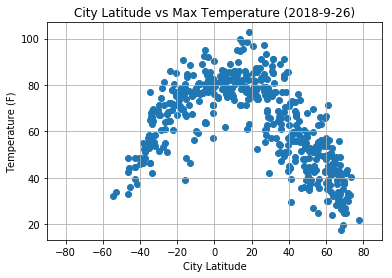

In [26]:
# Create and store temperature plot
plt.scatter(weather_df["Latitude"],weather_df["Temperature (F)"])
plt.xlim(-90,90)
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs Max Temperature ("+calldatestring+")")
plt.grid()
plt.savefig("figures/City Latitude vs Max Temperature "+calldatestring+".png")

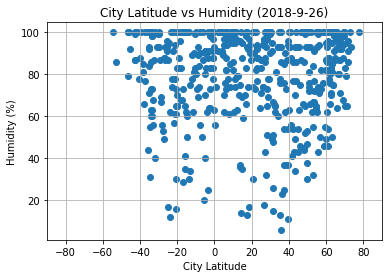

In [27]:
# Create and store humidity plot
plt.scatter(weather_df["Latitude"],weather_df["Humidity (%)"])
plt.xlim(-90,90)
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity ("+calldatestring+")")
plt.grid()
plt.savefig("figures/City Latitude vs Humidity "+calldatestring+".png")

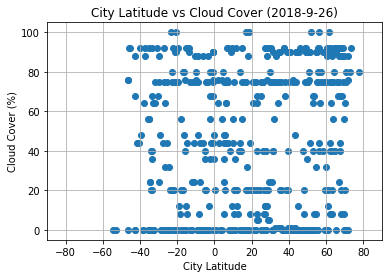

In [32]:
# Create and store cloud cover plot
plt.scatter(weather_df["Latitude"],weather_df["Cloud Cover (%)"])
plt.xlim(-90,90)
plt.xlabel("City Latitude")
plt.ylabel("Cloud Cover (%)")
plt.title("City Latitude vs Cloud Cover ("+calldatestring+")")
plt.grid()
plt.savefig("figures/City Latitude vs Cloud Cover "+calldatestring+".png")

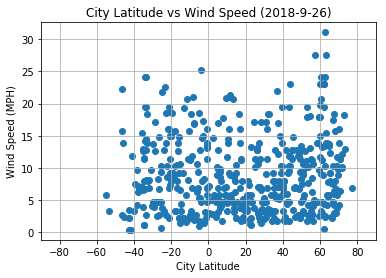

In [33]:
# Create and store wind speed plot
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed (MPH)"])
plt.xlim(-90,90)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title("City Latitude vs Wind Speed ("+calldatestring+")")
plt.grid()
plt.savefig("figures/City Latitude vs Wind Speed "+calldatestring+".png")